# Sales analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Merge 12 months of data into a single file
- Currently, the data exists as csv files per month.
- I would like to merge the contents of the csv files into one file to serve as an *annual* file.

In [8]:
import os

# Directory path
csv_files_path = "/Users/abrahambriones/Library/CloudStorage/OneDrive-Personal/Documents/LearnDataAnalysis/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data"

# A list of all .csv files
csv_files = os.listdir(csv_files_path)
# Removed this file to prevent traceback errors
csv_files.remove('.DS_Store')

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [10]:
# # Combine all files in the list and save to a new csv file
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
csv_out_path = "/Users/abrahambriones/Library/CloudStorage/OneDrive-Personal/Documents/LearnDataAnalysis/Pandas-Data-Science-Tasks/SalesAnalysis/Solutions/Annual_Sales_2019_v2.csv"
df.to_csv(csv_out_path, index=False)

In [12]:
df = pd.read_csv(csv_out_path)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [14]:
df.dtypes # Two columns should be change to numerical representations
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], errors='coerce')
df["Price Each"] = pd.to_numeric(df["Price Each"], errors='coerce')

In [15]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

## Task 1: Determine which month produced the most sales and report the revenue.
- It will be useful to create a month column


### Create a month column

In [16]:
# Make a new OrdeDate column with datatime objects
frmt = '%m/%d/%y %H:%M'
df['Order Date (datetime)'] =  pd.to_datetime(df['Order Date'], errors='coerce', format=frmt)

# Extract the months from the datetime column
df['Month'] = df['Order Date (datetime)'].dt.month


In [17]:
# New month column exists
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date (datetime),Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12.0
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12.0
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12.0
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12.0
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12.0


#### Let's look for NaN values

In [18]:
df.isna().sum()

Order ID                 505
Product                  505
Quantity Ordered         843
Price Each               843
Order Date               505
Purchase Address         505
Order Date (datetime)    843
Month                    843
dtype: int64

In [19]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date (datetime),Month
254,Order ID,Product,NaN,NaN,Order Date,Purchase Address,NaT,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
705,Order ID,Product,NaN,NaN,Order Date,Purchase Address,NaT,NaN
...,...,...,...,...,...,...,...,...
174182,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
174201,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
174274,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
174846,Order ID,Product,NaN,NaN,Order Date,Purchase Address,NaT,NaN


In [20]:
df.shape

(175164, 8)

- Out of the 1,235,425 rows, 1,049,475 rows are compleltely blank

In [21]:
df = df.dropna(axis=0)

#### All NaN values have been deleted

In [22]:
df.isna().sum()

Order ID                 0
Product                  0
Quantity Ordered         0
Price Each               0
Order Date               0
Purchase Address         0
Order Date (datetime)    0
Month                    0
dtype: int64

### Create a sales column
- sales is quantity * priceeach

In [23]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] 

In [24]:
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date (datetime),Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,11.95


## Task 1: Determine which month produced the most sales and report the revenue.

In [25]:
monthly_sales = df.groupby(by=['Month']).sum()
monthly_sales.sort_values(by='Sales')

,Quantity Ordered,Price Each,Sales
Month,,,
9,12.0,2096.74,2096.74
1,10903.0,1811768.38,1822256.73
2,13449.0,2188884.72,2202022.42
8,13448.0,2230345.42,2244467.88
6,15253.0,2562025.61,2577802.26
7,16072.0,2632539.56,2647775.76
3,17005.0,2791207.83,2807100.38
5,18667.0,3135125.13,3152606.75
11,19798.0,3180600.68,3199603.20


It can be seen that December reported the most sales while January reported the least sales.

<AxesSubplot:xlabel='Month', ylabel='Sales'>

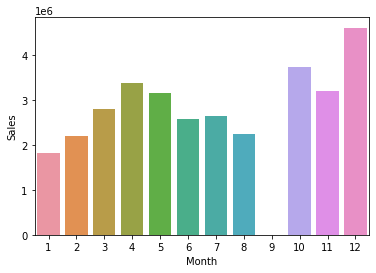

In [26]:
### Let's visualize these results with a bar plot
### Example with SNS and Matplotlib
x_axis = monthly_sales.index
y_axis = monthly_sales['Sales']
sns.barplot(x=x_axis, y=y_axis)

Text(0, 0.5, 'Sales')

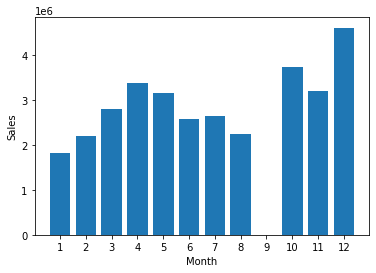

In [27]:
plt.bar(x_axis, y_axis)
plt.xticks(x_axis)
plt.xlabel("Month")
plt.ylabel("Sales")

## Task 2: Which city had the highest number of sales?
- Will be useful to create a city column




In [28]:
df['City'] = [address.split(', ')[1] for address in df['Purchase Address']]
df['State'] = [address.split(", ")[2].split()[0] for address in df['Purchase Address']]
df["City (State)"] = df["City"] + " (" + df["State"] + ")"

# Alternative method 
# df['City'] = df['Purchase Addresss'].apply(lambda x: x.split(', ')[1])

In [29]:
# City column has been created
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date (datetime),Month,Sales,City,State,City (State)
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,1700.00,New York City,NY,New York City (NY)
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,600.00,New York City,NY,New York City (NY)
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,11.95,New York City,NY,New York City (NY)
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,149.99,San Francisco,CA,San Francisco (CA)
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,11.95,Atlanta,GA,Atlanta (GA)


In [30]:
city_sales = df.groupby(by=['City (State)']).sum()
city_sales

,Quantity Ordered,Price Each,Month,Sales
City (State),,,,
Atlanta (GA),15567.0,2609984.35,96559,2624219.69
Austin (TX),10387.0,1703920.80,63832,1712971.16
Boston (MA),21073.0,3391858.04,129564,3414273.28
Dallas (TX),15676.0,2589548.80,96204,2603759.55
Los Angeles (CA),31164.0,5068766.68,191365,5098352.38
New York City (NY),26221.0,4335662.80,161914,4363026.66
Portland (ME),2589.0,418532.21,15839,420998.71
Portland (OR),10635.0,1757020.26,65274,1766542.42
San Francisco (CA),47153.0,7749595.73,290907,7797674.26


It can be seen that San Francisco reported the most sales while Portland, Maine reported the least sales

Text(0, 0.5, 'Sales')

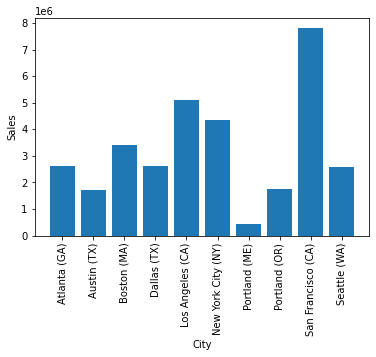

In [31]:
x_axis = city_sales.index
y_axis = city_sales['Sales']
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, rotation='vertical')
plt.xlabel("City")
plt.ylabel("Sales")

## Task 3: At what time should advertisements be aired to sell the most product?
- Will be useful to create an Hour column

In [32]:
# Create a time column
df['Hour'] = df['Order Date (datetime)'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date (datetime),Month,Sales,City,State,City (State),Hour
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,1700.00,New York City,NY,New York City (NY),0
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,600.00,New York City,NY,New York City (NY),7
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,11.95,New York City,NY,New York City (NY),18
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,149.99,San Francisco,CA,San Francisco (CA),15
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,11.95,Atlanta,GA,Atlanta (GA),12


In [33]:
hourly_sales = df.groupby(by='Hour').count()[['Product']]
hourly_sales

,Product
Hour,
0,3650
1,2186
2,1165
3,776
4,815
5,1232
6,2338
7,3794
8,5881


Text(0, 0.5, 'Product Units')

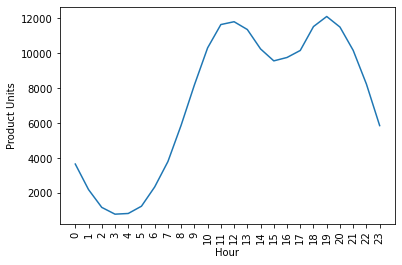

In [34]:
x_axis = hourly_sales.index
y_axis = hourly_sales['Product']
plt.plot(x_axis, y_axis)
plt.xticks(x_axis, rotation='vertical')
plt.xlabel("Hour")
plt.ylabel("Product Units")

It seems that most products are sold between the hours of 6pm and 8pm.

## Task 4: What products are most often sold together? 

In [35]:
# Let's get the rows who have the same order IDs so that we can find items 
# that were sold together
same_order_id = df[df.duplicated(subset=['Order ID'], keep=False)]
same_order_id.head(20)

same_order_id['Grouped Products'] = same_order_id.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


/var/folders/th/rzp35bqs0q13cj8krjh_q7vm0000gn/T/ipykernel_14866/3907463101.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_order_id['Grouped Products'] = same_order_id.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [43]:
# Now we have a column with the pairs of products that share the same ID
same_order_id.head()

,Order ID,Grouped Products
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."


In [37]:
# Let's drop the duplicate entries so that we have unique group product pairs
same_order_id = same_order_id[['Order ID', 'Grouped Products']].drop_duplicates()
same_order_id

,Order ID,Grouped Products
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."
...,...,...
175112,222863,"27in FHD Monitor, Bose SoundSport Headphones"
175118,222868,"iPhone, Apple Airpods Headphones"
175133,222882,"Apple Airpods Headphones, AA Batteries (4-pack)"
175136,222884,"Google Phone, USB-C Charging Cable"


In [38]:
# Source: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

# Split the group products column into a list to use with the libraries
# Change the int value to view groups of 2, 3, etc.
for prod in same_order_id['Grouped Products']:
    prod_list = prod.split(', ')
    count.update(combinations(prod_list, 2))
    
print(count.most_common(3))


[(('iPhone', 'Lightning Charging Cable'), 944), (('Google Phone', 'USB-C Charging Cable'), 927), (('iPhone', 'Wired Headphones'), 420)]


## Task 5: Which product is most often sold?

In [39]:
product_sales = df.groupby(['Product']).sum()
product_sales

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,3852.0,420931.73,26869,423681.48,54883
27in 4K Gaming Monitor,5862.0,2281051.51,41010,2286121.38,85348
27in FHD Monitor,7068.0,1054129.72,48247,1060129.32,100632
34in Ultrawide Monitor,5821.0,2205461.96,39911,2211921.79,83502
AA Batteries (4-pack),25862.0,73958.40,133703,99310.08,279185
AAA Batteries (4-pack),29090.0,57877.43,134811,86979.10,278880
Apple Airpods Headphones,14693.0,2187750.00,100800,2203950.00,209264
Bose SoundSport Headphones,12627.0,1249775.01,86676,1262573.73,180382
Flatscreen TV,4525.0,1352700.00,31605,1357500.00,64680


Text(0, 0.5, 'Product Units')

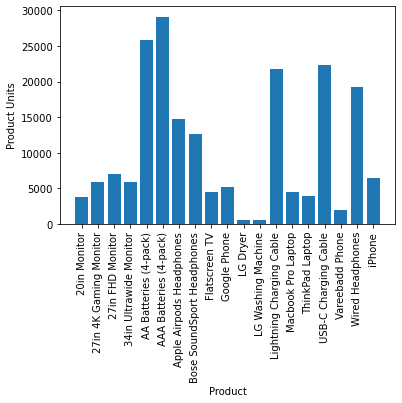

In [110]:
x1 = product_sales.index
y1 = product_sales['Quantity Ordered']

plt.bar(x1, y1)
plt.xticks(x1, rotation='vertical')
plt.xlabel("Product")
plt.ylabel("Product Units")

AAA and AA batteries are the most sold products. Let's see if there is a correlation between the price of the product and the
quantitiy of units sold:

/var/folders/th/rzp35bqs0q13cj8krjh_q7vm0000gn/T/ipykernel_14866/175620999.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, rotation='vertical', size=8)


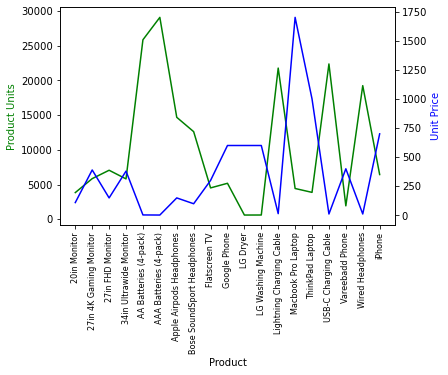

In [126]:
# Source: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
y2 = df.groupby('Product')['Price Each'].max()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x1, y1, 'g-')
ax2.plot(x1, y2, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Product Units', color='g')
ax2.set_ylabel('Unit Price', color='b')
ax1.set_xticklabels(x1, rotation='vertical', size=8)

plt.show()


It seems that when the price is low, the amount of units sold is high. Of course, this trend is not entirely true for premium tech products.

In [127]:
csv_out_path = "/Users/abrahambriones/Library/CloudStorage/OneDrive-Personal/Documents/LearnDataAnalysis/Pandas-Data-Science-Tasks/SalesAnalysis/Solutions/Annual_Sales_2019_v3.csv"
df.to_csv(csv_out_path)